In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
path = "./../MICS6_2019_Stats Day Competition/Datasets/wm_Women_15_to_49_Stat_Day.xlsx"
women_dataset = pd.read_excel(path)
path_2 = "./../MICS6_2019_Stats Day Competition/Datasets/hh_Household_Stat_Day.xlsx"
household_dataset = pd.read_excel(path_2)

In [3]:
tx = women_dataset["welevel"]

In [4]:
# HH2 - Household number
# HH7 - Region
# HH6 - Area
hh_extract = household_dataset[["HH1", "HH2", "HH7", "HH6"]]
hh_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HH1     8285 non-null   int64
 1   HH2     8285 non-null   int64
 2   HH7     8285 non-null   int64
 3   HH6     8285 non-null   int64
dtypes: int64(4)
memory usage: 259.0 KB


In [5]:
# HH1 - cluster number
# HH2  - Household number
# WB4  - Age of women
# WB5  - Ever attended school
# WB6A - Highest level of school attended
# WB14 - Can read part of sentence
w_extract = women_dataset[["HH1", "HH2",
                           "WB4", "WB5", "WB6A", "WB14", "welevel"]]
# temp = dataset[selected_columns]
# df_0 = temp[temp["helevel"].notna() &
#            temp["HHSEX"].notna()]
# temp.info()
# df_0.info()
# df_0 = df_0[df_0["helevel"] != 9]
w_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HH1      6576 non-null   int64  
 1   HH2      6576 non-null   int64  
 2   WB4      5887 non-null   float64
 3   WB5      5887 non-null   float64
 4   WB6A     5790 non-null   float64
 5   WB14     742 non-null    float64
 6   welevel  5887 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 359.8 KB


In [6]:
# HH1 - cluster_number
# HH2 - household_number
def get_region_and_area(cluster_number, household_number):
    temp = hh_extract[(hh_extract["HH1"] == cluster_number) &
                      (hh_extract["HH2"] == household_number)]
    return temp[["HH7", "HH6"]]


t = w_extract.apply(lambda x: get_region_and_area(
    x["HH1"], x["HH2"])[["HH7", "HH6"]].values[0], axis=1)

In [7]:
a = pd.Series.to_frame(t)
w_extract["HH7"] = a.apply(lambda x: x[0][0], axis=1)
w_extract["HH6"] = a.apply(lambda x: x[0][1], axis=1)
# t.head()
w_extract

/tmp/ipykernel_6310/119926410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_extract["HH7"] = a.apply(lambda x: x[0][0], axis=1)
/tmp/ipykernel_6310/119926410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_extract["HH6"] = a.apply(lambda x: x[0][1], axis=1)


,HH1,HH2,WB4,WB5,WB6A,WB14,welevel,HH7,HH6
0,1,1,43.0,2.0,NaN,1.0,0.0,1,1
1,1,5,36.0,2.0,NaN,1.0,0.0,1,1
2,1,6,23.0,2.0,NaN,1.0,0.0,1,1
3,1,7,30.0,1.0,2.0,NaN,2.0,1,1
4,1,8,30.0,1.0,1.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...
6571,435,14,16.0,1.0,3.0,NaN,2.0,10,1
6572,435,15,45.0,1.0,4.0,NaN,3.0,10,1
6573,435,19,37.0,1.0,4.0,NaN,3.0,10,1
6574,435,20,NaN,NaN,NaN,NaN,NaN,10,1


## Highest level of school attended


In [8]:
highest_level_of_school_attended = w_extract[["HH7", "HH6", "WB6A"]]

# remove na
cleaned_highest_level_of_school_attended = highest_level_of_school_attended[highest_level_of_school_attended["WB6A"].notna(
)]

cleaned_highest_level_of_school_attended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5790 entries, 3 to 6575
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HH7     5790 non-null   int64  
 1   HH6     5790 non-null   int64  
 2   WB6A    5790 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 180.9 KB


In [9]:
respondents_per_region = cleaned_highest_level_of_school_attended[["HH7", "WB6A"]].groupby(
    by="HH7").count()
respondents_per_region.rename(
    columns={"WB6A": "education_level_count"}, inplace=True)
respondents_per_region.reset_index(inplace=True)
respondents_per_region

,HH7,education_level_count
0,1,463
1,2,542
2,3,785
3,4,1024
4,5,573
5,6,841
6,7,348
7,8,267
8,9,439
9,10,508


In [10]:
# each education level in each region by percentage of total respondents in the region
def get_region_total(region_number):
    region_total = respondents_per_region[respondents_per_region["HH7"]
                                          == region_number]["education_level_count"].values[0]
    return region_total

In [11]:
df_graph_1 = cleaned_highest_level_of_school_attended.groupby(
    by=["HH7", "HH6", "WB6A"])["WB6A"].count()

# df_graph_1.reset_index(inplace=True)
df_graph_1 = pd.Series.to_frame(df_graph_1)
df_graph_1.rename(columns={"WB6A": "WB6A_count"}, inplace=True)
df_graph_1.reset_index(inplace=True)
df_graph_1["education_level_count_by_region_total"] = df_graph_1.apply(
    lambda x: x["WB6A_count"]/get_region_total(x["HH7"]), axis=1)
df_graph_1

,HH7,HH6,WB6A,WB6A_count,education_level_count_by_region_total
0,1,1,1.0,30,0.064795
1,1,1,2.0,27,0.058315
2,1,1,3.0,75,0.161987
3,1,1,4.0,4,0.008639
4,1,2,1.0,68,0.146868
...,...,...,...,...,...
75,10,1,9.0,1,0.001969
76,10,2,1.0,4,0.007874
77,10,2,2.0,15,0.029528
78,10,2,3.0,38,0.074803


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


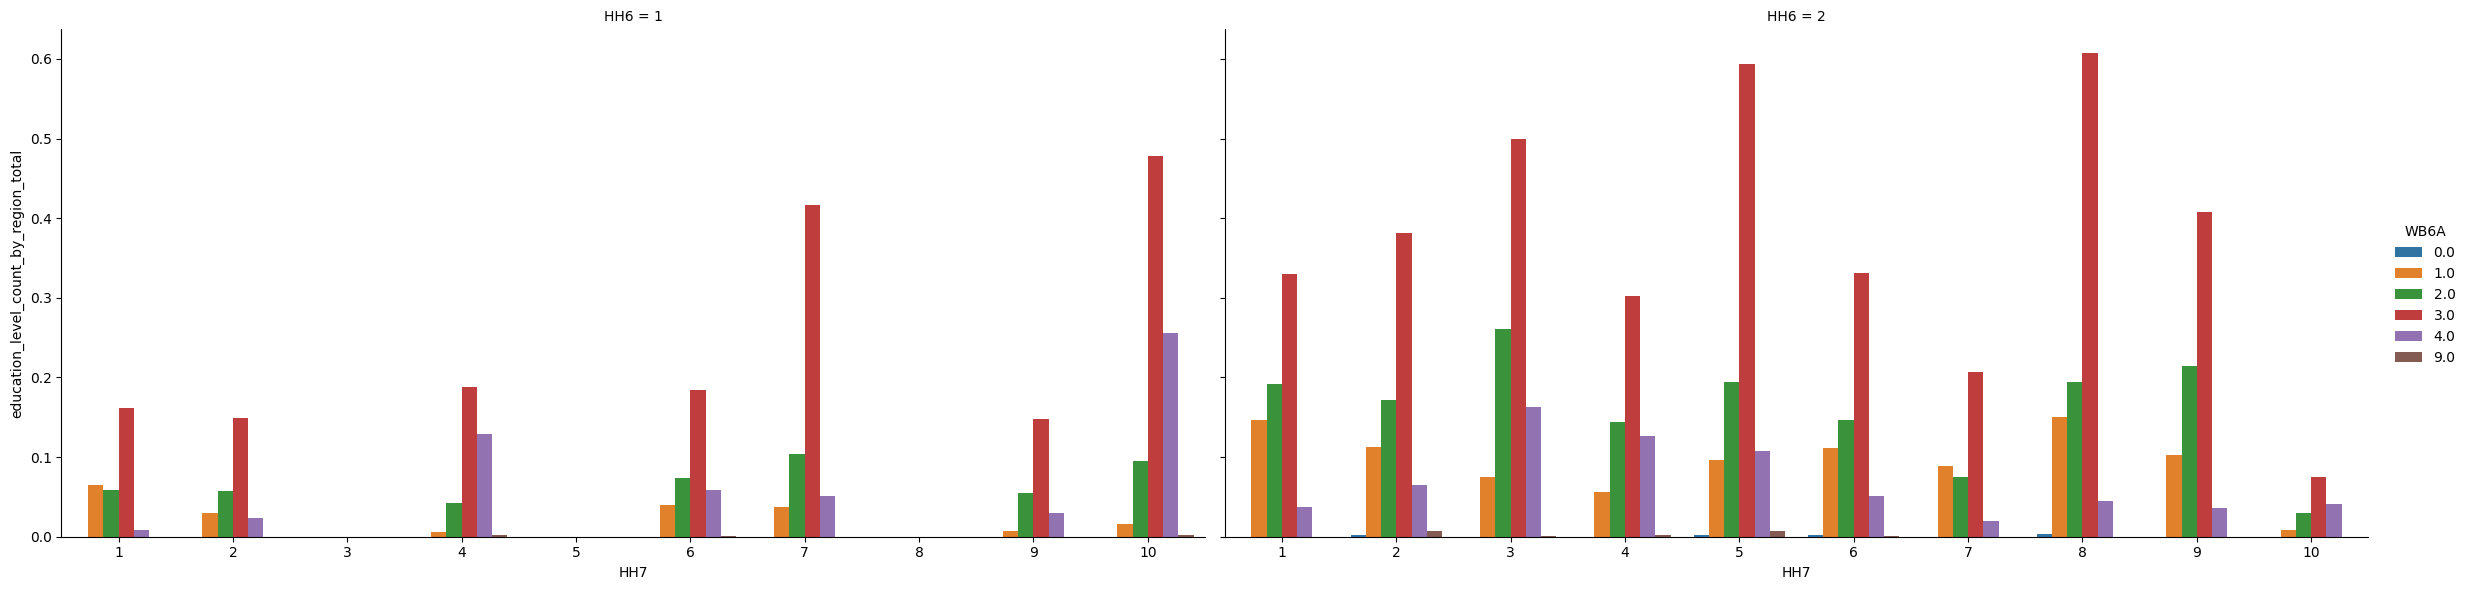

In [12]:
bx = sns.catplot(
    data=df_graph_1,
    x="HH7",
    y="education_level_count_by_region_total",
    hue="WB6A",
    col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)

## Women highest level of school attended in rural area per region


In [13]:
rural_women = cleaned_highest_level_of_school_attended[
    cleaned_highest_level_of_school_attended["HH6"] == 2]
rural_respondents_per_region = rural_women[["HH7", "WB6A"]].groupby(
    by="HH7").count()
rural_respondents_per_region.rename(
    columns={"WB6A": "rural_respondents_count"}, inplace=True)
rural_respondents_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_rural_region_total(region_number):
    rural_region_total = rural_respondents_per_region[rural_respondents_per_region["HH7"]
                                                      == region_number]["rural_respondents_count"].values[0]
    return rural_region_total


df_rural_women = rural_women[["HH7", "WB6A"]].groupby(by=["HH7", "WB6A"])[
    "WB6A"].count()
df_rural_women = pd.Series.to_frame(df_rural_women)
df_rural_women.rename(
    columns={"WB6A": "rural_level_of_education_count"}, inplace=True)
df_rural_women.reset_index(inplace=True)
df_rural_women["rural_level_of_education_per_region"] = df_rural_women.apply(
    lambda x: x["rural_level_of_education_count"]/get_rural_region_total(x["HH7"]), axis=1)
df_rural_women

,HH7,WB6A,rural_level_of_education_count,rural_level_of_education_per_region
0,1,1.0,68,0.207951
1,1,2.0,89,0.272171
2,1,3.0,153,0.467890
3,1,4.0,17,0.051988
4,2,0.0,1,0.002494
5,2,1.0,61,0.152120
6,2,2.0,93,0.231920
7,2,3.0,207,0.516209
8,2,4.0,35,0.087282
9,2,9.0,4,0.009975


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


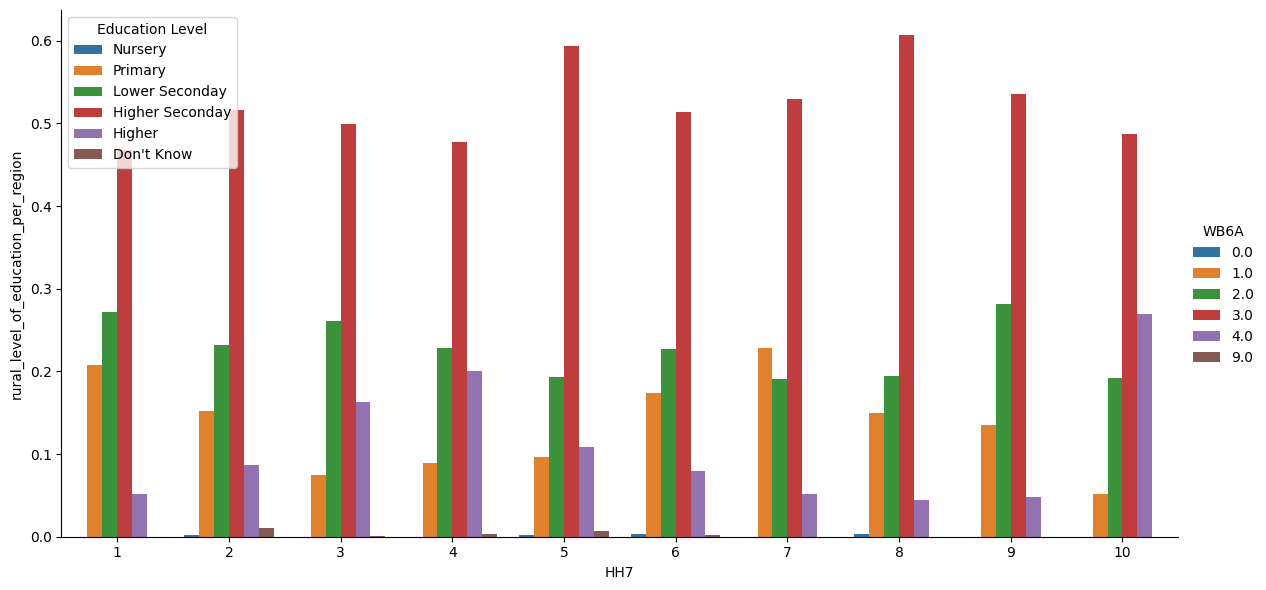

In [14]:
bx = sns.catplot(
    data=df_rural_women,
    x="HH7",
    y="rural_level_of_education_per_region",
    hue="WB6A",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Nursery",
    "Primary",
    "Lower Seconday",
    "Higher Seconday",
    "Higher",
    "Don't Know"
])

## Women highest level of school attended in urban area per region


In [30]:
urban_women = cleaned_highest_level_of_school_attended[
    cleaned_highest_level_of_school_attended["HH6"] == 1]
urban_respondents_per_region = urban_women[["HH7", "WB6A"]].groupby(
    by="HH7").count()
urban_respondents_per_region.rename(
    columns={"WB6A": "urban_respondents_count"}, inplace=True)
urban_respondents_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_urban_region_total(region_number):
    urban_region_total = urban_respondents_per_region[urban_respondents_per_region["HH7"]
                                                      == region_number]["urban_respondents_count"].values[0]
    return urban_region_total


df_urban_women = urban_women[["HH7", "WB6A"]].groupby(by=["HH7", "WB6A"])[
    "WB6A"].count()
df_urban_women = pd.Series.to_frame(df_urban_women)
df_urban_women.rename(
    columns={"WB6A": "urban_level_of_education_count"}, inplace=True)
df_urban_women.reset_index(inplace=True)
df_urban_women["urban_level_of_education_per_region"] = df_urban_women.apply(
    lambda x: x["urban_level_of_education_count"]/get_urban_region_total(x["HH7"]), axis=1)
df_urban_women

,HH7,WB6A,urban_level_of_education_count,urban_level_of_education_per_region
0,1,1.0,30,0.220588
1,1,2.0,27,0.198529
2,1,3.0,75,0.551471
3,1,4.0,4,0.029412
4,2,1.0,16,0.113475
5,2,2.0,31,0.219858
6,2,3.0,81,0.574468
7,2,4.0,13,0.092199
8,4,1.0,6,0.015915
9,4,2.0,44,0.116711


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


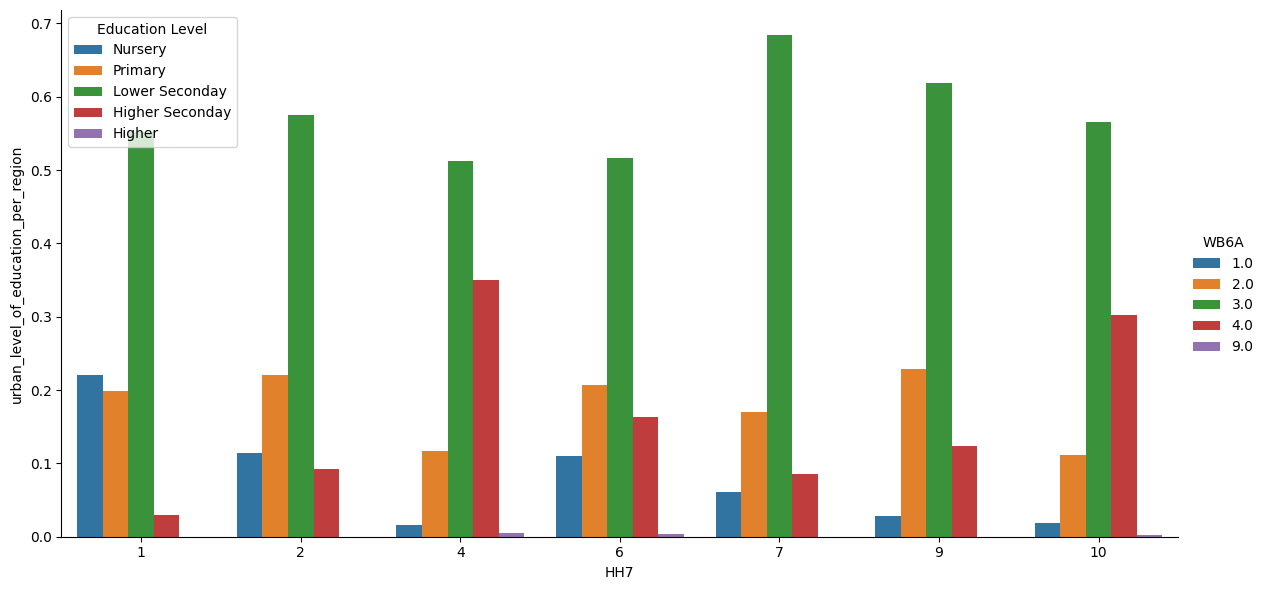

In [31]:
cx = sns.catplot(
    data=df_urban_women,
    x="HH7",
    y="urban_level_of_education_per_region",
    hue="WB6A",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Nursery",
    "Primary",
    "Lower Seconday",
    "Higher Seconday",
    "Higher",
    "Don't Know"
])

## Women Highest level of school attended per Region Combined (Urban/Rural)


In [169]:
w_el_urban_rural = df_urban_women[[
    "HH7", "WB6A", "urban_level_of_education_per_region"]]
w_el_urban_rural.rename(
    columns={"urban_level_of_education_per_region": "level_of_education_per_region"}, inplace=True)
w_el_urban_rural["urban_rural"] = "urban"
w_el_urban_rural
t_df = df_rural_women[["HH7", "WB6A", "rural_level_of_education_per_region"]]
t_df["urban_rural"] = "rural"
t_df.rename(
    columns={"rural_level_of_education_per_region": "level_of_education_per_region"}, inplace=True)
combined = pd.concat([w_el_urban_rural, t_df], ignore_index=True)

total_urban_women = urban_women["WB6A"].size
urban_attended_nursery = urban_women[urban_women["WB6A"]
                                     == 0.0]["WB6A"].size/total_urban_women
urban_attended_primary = urban_women[urban_women["WB6A"]
                                     == 1.0]["WB6A"].size/total_urban_women

urban_attended_lower_sec = urban_women[urban_women["WB6A"]
                                       == 2.0]["WB6A"].size/total_urban_women
urban_attended_higher_sec = urban_women[urban_women["WB6A"]
                                        == 3.0]["WB6A"].size/total_urban_women
urban_attended_higher = urban_women[urban_women["WB6A"]
                                    == 4.0]["WB6A"].size/total_urban_women
urban_attended_dont_know = urban_women[urban_women["WB6A"]
                                       == 9.0]["WB6A"].size/total_urban_women

total_rural_women = rural_women["WB6A"].size
rural_attended_nursery = rural_women[rural_women["WB6A"]
                                     == 0.0]["WB6A"].size/total_rural_women
rural_attended_primary = rural_women[rural_women["WB6A"]
                                     == 1.0]["WB6A"].size/total_rural_women

rural_attended_lower_sec = rural_women[rural_women["WB6A"]
                                       == 2.0]["WB6A"].size/total_rural_women
rural_attended_higher_sec = rural_women[rural_women["WB6A"]
                                        == 3.0]["WB6A"].size/total_rural_women
rural_attended_higher = rural_women[rural_women["WB6A"]
                                    == 4.0]["WB6A"].size/total_rural_women
rural_attended_dont_know = rural_women[rural_women["WB6A"]
                                       == 9.0]["WB6A"].size/total_rural_women


def set_education_level_name(level_number):
    if level_number == 0.0:
        return "Nursery"
    elif level_number == 1.0:
        return "Primary"
    elif level_number == 2.0:
        return "Lower Secondary"
    elif level_number == 3.0:
        return "Higher Secondary"
    elif level_number == 4.0:
        return "Higher"
    elif level_number == 9.0:
        return "Don't Know"


combined["WB6A_name"] = combined.apply(
    lambda x: set_education_level_name(x["WB6A"]), axis=1)

combined

/tmp/ipykernel_6310/2593337335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_el_urban_rural.rename(


,HH7,WB6A,level_of_education_per_region,urban_rural,WB6A_name
0,1,1.0,0.220588,urban,Primary
1,1,2.0,0.198529,urban,Lower Secondary
2,1,3.0,0.551471,urban,Higher Secondary
3,1,4.0,0.029412,urban,Higher
4,2,1.0,0.113475,urban,Primary
...,...,...,...,...,...
75,9,4.0,0.047904,rural,Higher
76,10,1.0,0.051282,rural,Primary
77,10,2.0,0.192308,rural,Lower Secondary
78,10,3.0,0.487179,rural,Higher Secondary


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


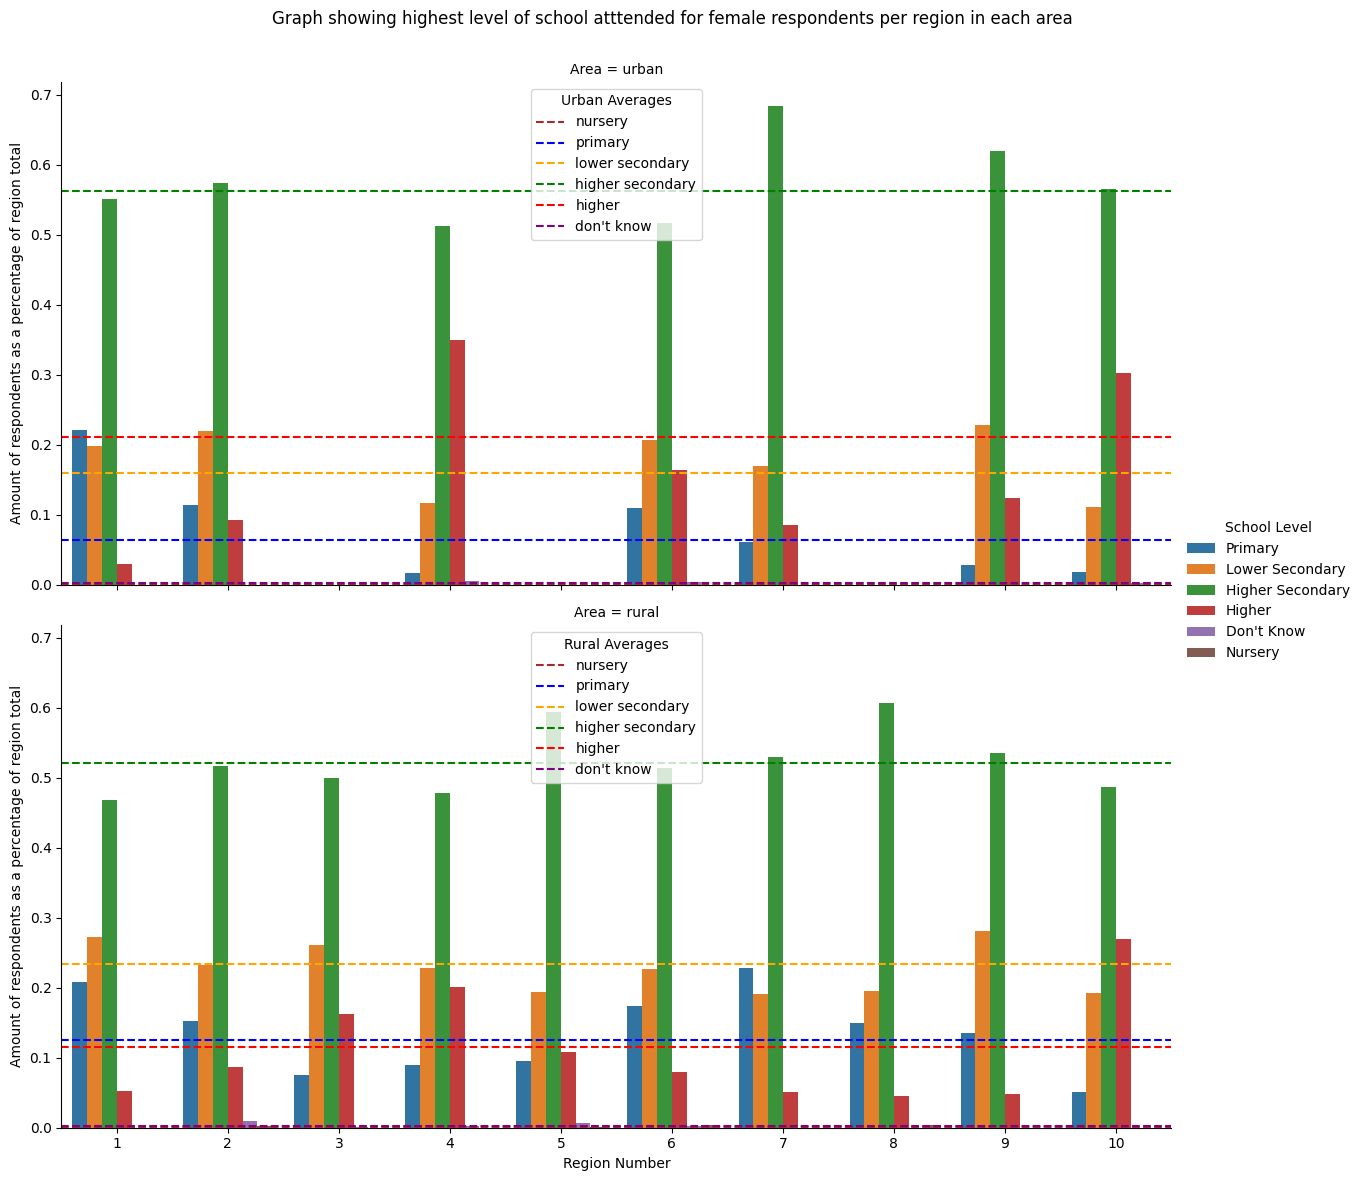

In [214]:
ex = sns.catplot(
    data=combined,
    x="HH7",
    y="level_of_education_per_region",
    hue="WB6A_name",
    row="urban_rural",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None,
    legend=True,
    legend_out=True
)
urban_ex = ex.axes[0][0]
rural_ex = ex.axes[1][0]
ex.fig.subplots_adjust(top=0.92)
ex.set_axis_labels(
    "Region Number", "Amount of respondents as a percentage of region total")
ex.set_titles("Area = {row_name}")

ex.fig.suptitle(
    "Graph showing highest level of school atttended for female respondents per region in each area")

u1 = urban_ex.axhline(urban_attended_nursery, linestyle="dashed",
                      label="nursery", color="brown")
u2 = urban_ex.axhline(urban_attended_primary, linestyle="dashed", color="blue",
                      label="primary")
u3 = urban_ex.axhline(urban_attended_lower_sec, linestyle="dashed", color="orange",
                      label="lower secondary")
u4 = urban_ex.axhline(urban_attended_higher_sec, linestyle="dashed", color="green",
                      label="higher secondary")
u5 = urban_ex.axhline(urban_attended_higher, linestyle="dashed", color="red",
                      label="higher")
u6 = urban_ex.axhline(urban_attended_dont_know, linestyle="dashed", color="purple",
                      label="don't know")

r1 = rural_ex.axhline(rural_attended_nursery, linestyle="dashed",
                      label="nursery", color="brown")
r2 = rural_ex.axhline(rural_attended_primary, linestyle="dashed", color="blue",
                      label="primary")
r3 = rural_ex.axhline(rural_attended_lower_sec, linestyle="dashed", color="orange",
                      label="lower secondary")
r4 = rural_ex.axhline(rural_attended_higher_sec, linestyle="dashed", color="green",
                      label="higher secondary")
r5 = rural_ex.axhline(rural_attended_higher, linestyle="dashed", color="red",
                      label="higher")
r6 = rural_ex.axhline(rural_attended_dont_know, linestyle="dashed", color="purple",
                      label="don't know")

urban_ex.legend(handles=[u1, u2, u3, u4, u5, u6],
                title="Urban Averages", loc="upper center")
rural_ex.legend(handles=[r1, r2, r3, r4, r5, r6],
                title="Rural Averages", loc="upper center")

ex.legend.set_title("School Level")

In [231]:
urban_averages = [
    urban_attended_nursery,
    urban_attended_primary,
    urban_attended_lower_sec,
    urban_attended_higher_sec,
    urban_attended_higher,
    urban_attended_dont_know,
]

rural_averages = [
    rural_attended_nursery,
    rural_attended_primary,
    rural_attended_lower_sec,
    rural_attended_higher_sec,
    rural_attended_higher,
    rural_attended_dont_know,
]
women_averages = pd.DataFrame()
women_averages["urban_women_averages"] = urban_averages
women_averages["rural_women_averages"] = rural_averages
women_averages.rename(index={0: "nursery", 1: "primary", 2: "lower secondary",
                             3: "higher secondary", 4: "higher", 5: "don't know"}, inplace=True)
women_averages

,urban_women_averages,rural_women_averages
nursery,0.000000,0.001223
primary,0.064080,0.125948
lower secondary,0.159906,0.233798
higher secondary,0.562610,0.520910
higher,0.211052,0.115187
don't know,0.002352,0.002935


In [217]:
combined.to_csv("women_highest_school_level_attended_combined.csv")
women_averages.to_csv("women_highest_school_level_attended_averages.csv")

## Women education level urban


In [ ]:
w_education_level = w_extract[["HH7", "HH6", "welevel"]]
w_education_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HH7      6576 non-null   int64  
 1   HH6      6576 non-null   int64  
 2   welevel  5887 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 154.2 KB


In [ ]:
cleaned_w_education_level = w_education_level[w_education_level["welevel"].notnull(
)]

In [ ]:
urban_women_el = cleaned_w_education_level[
    cleaned_w_education_level["HH6"] == 1]
urban_respondents_el_per_region = urban_women_el[["HH7", "welevel"]].groupby(
    by="HH7").count()
urban_respondents_el_per_region.rename(
    columns={"welevel": "urban_respondents_count"}, inplace=True)
urban_respondents_el_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_urban_region_total_el(region_number):
    urban_region_total = urban_respondents_el_per_region[urban_respondents_el_per_region["HH7"]
                                                         == region_number]["urban_respondents_count"].values[0]
    return urban_region_total


df_urban_women_el = urban_women_el[["HH7", "welevel"]].groupby(by=["HH7", "welevel"])[
    "welevel"].count()
df_urban_women_el = pd.Series.to_frame(df_urban_women_el)
df_urban_women_el.rename(
    columns={"welevel": "urban_level_of_education_count"}, inplace=True)
df_urban_women_el.reset_index(inplace=True)
df_urban_women_el["urban_level_of_education_per_region"] = df_urban_women_el.apply(
    lambda x: x["urban_level_of_education_count"]/get_urban_region_total_el(x["HH7"]), axis=1)
# df_urban_women_el["urban_level_of_education_per_region"] = df_urban_women_el.apply(
#    lambda x: get_urban_region_total_el(x["HH7"]), axis=1)
df_urban_women_el

,HH7,welevel,urban_level_of_education_count,urban_level_of_education_per_region
0,1,0.0,6,0.042254
1,1,1.0,30,0.211268
2,1,2.0,102,0.718310
3,1,3.0,4,0.028169
4,2,0.0,3,0.020833
5,2,1.0,16,0.111111
6,2,2.0,112,0.777778
7,2,3.0,13,0.090278
8,4,1.0,6,0.015915
9,4,2.0,237,0.628647


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


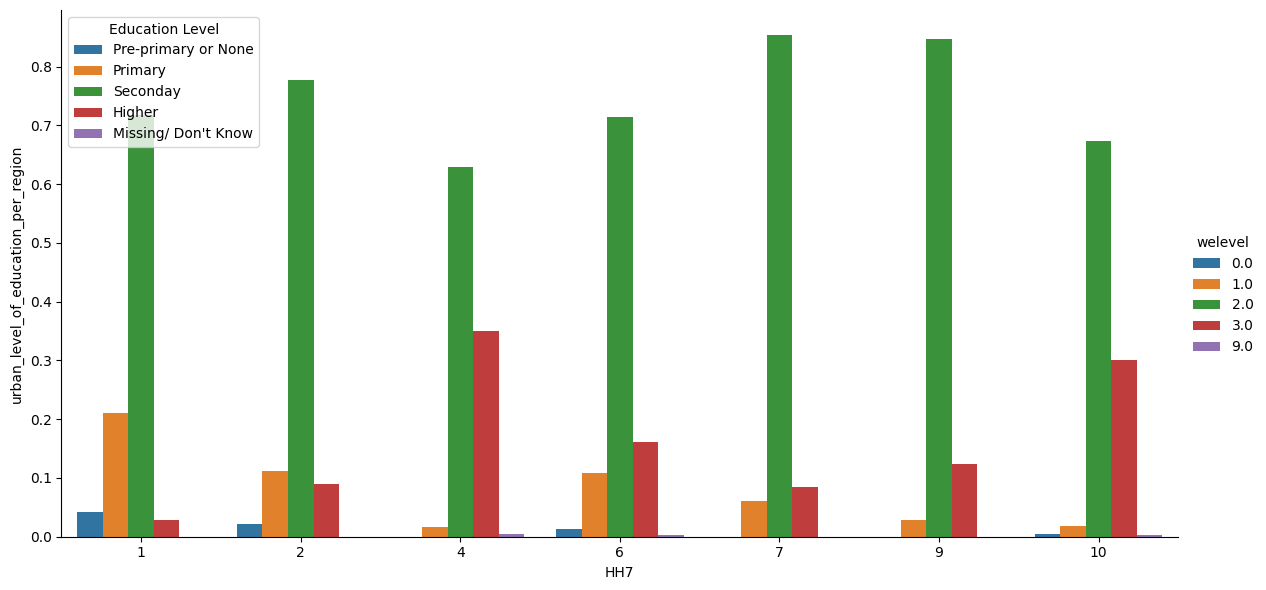

In [ ]:
dx = sns.catplot(
    data=df_urban_women_el,
    x="HH7",
    y="urban_level_of_education_per_region",
    hue="welevel",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Pre-primary or None",
    "Primary",
    "Seconday",
    "Higher",
    "Missing/ Don't Know"
])

In [ ]:
rural_women_el = cleaned_w_education_level[
    cleaned_w_education_level["HH6"] == 2]
rural_respondents_el_per_region = rural_women_el[["HH7", "welevel"]].groupby(
    by="HH7").count()
rural_respondents_el_per_region.rename(
    columns={"welevel": "rural_respondents_count"}, inplace=True)
rural_respondents_el_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_rural_region_total_el(region_number):
    rural_region_total = rural_respondents_el_per_region[rural_respondents_el_per_region["HH7"]
                                                         == region_number]["rural_respondents_count"].values[0]
    return rural_region_total


df_rural_women_el = rural_women_el[["HH7", "welevel"]].groupby(by=["HH7", "welevel"])[
    "welevel"].count()
df_rural_women_el = pd.Series.to_frame(df_rural_women_el)
df_rural_women_el.rename(
    columns={"welevel": "rural_level_of_education_count"}, inplace=True)
df_rural_women_el.reset_index(inplace=True)
df_rural_women_el["rural_level_of_education_per_region"] = df_rural_women_el.apply(
    lambda x: x["rural_level_of_education_count"]/get_rural_region_total_el(x["HH7"]), axis=1)
# df_rural_women_el["urban_level_of_education_per_region"] = df_urban_women_el.apply(
#    lambda x: get_rural_region_total_el(x["HH7"]), axis=1)
df_rural_women_el

,HH7,welevel,rural_level_of_education_count,rural_level_of_education_per_region
0,1,0.0,23,0.065714
1,1,1.0,68,0.194286
2,1,2.0,242,0.691429
3,1,3.0,17,0.048571
4,2,0.0,6,0.014778
5,2,1.0,61,0.150246
6,2,2.0,300,0.738916
7,2,3.0,35,0.086207
8,2,9.0,4,0.009852
9,3,0.0,10,0.012579


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


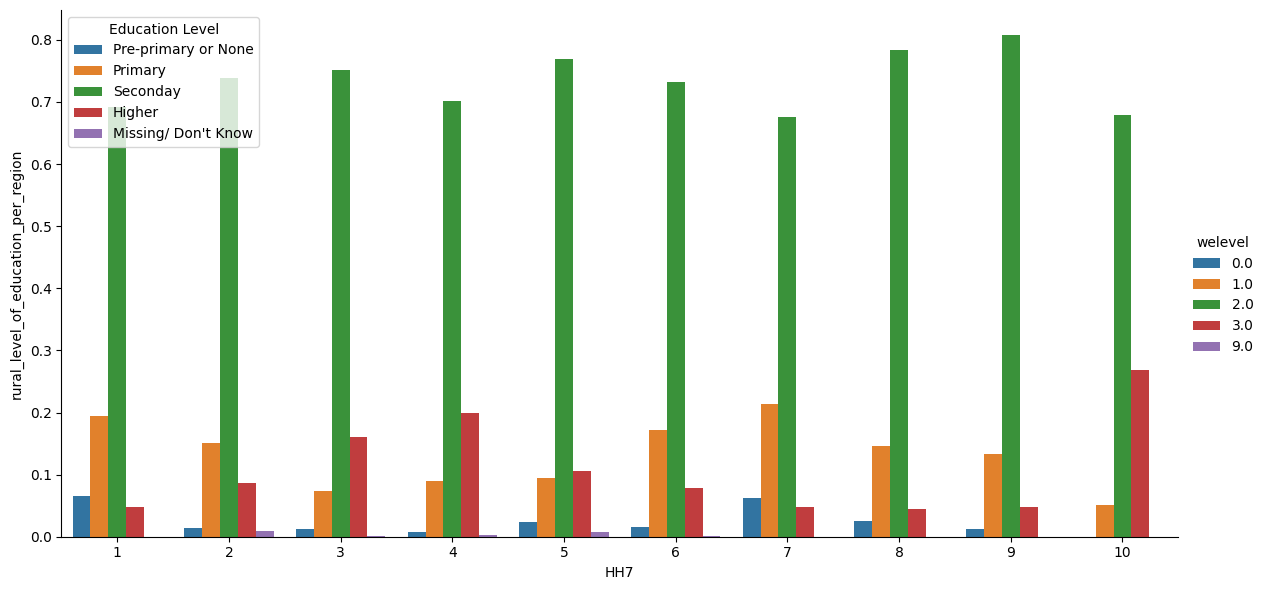

In [ ]:
dx = sns.catplot(
    data=df_rural_women_el,
    x="HH7",
    y="rural_level_of_education_per_region",
    hue="welevel",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Pre-primary or None",
    "Primary",
    "Seconday",
    "Higher",
    "Missing/ Don't Know"
])